In [0]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(13337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras import callbacks
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [0]:
Dataset = pd.read_csv('/content/Bi_Sch_final6.csv')
Dataset = Dataset.sample(frac=1)

#t = Dataset.iloc[5800:-1,:].values
#Dataset = Dataset.iloc[0:5800,:].values

Data_X = Dataset.iloc[:,0:-1].values
Data_Y = Dataset.iloc[:,-1].values
Data_X,T,Data_Y,C = train_test_split(Data_X, Data_Y, test_size = 0.2)
X,Val_X,Y,Val_C = train_test_split(Data_X, Data_Y, test_size = 0.25)


In [0]:
scaler = StandardScaler()
trainX = scaler.fit_transform(Data_X)

np.set_printoptions(precision=3)

testT = scaler.transform(T)
np.set_printoptions(precision=3)

Val_X = scaler.transform(Val_X)
np.set_printoptions(precision=3)

In [76]:
y_train = np.array(Data_Y)
y_test = np.array(C)
y_val = np.array(Val_C)

X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))
X_val = np.reshape(Val_X, (Val_X.shape[0], 1, Val_X.shape[1]))
"""X_train = trainX
X_test = testT
X_val = Val_X"""

'X_train = trainX\nX_test = testT\nX_val = Val_X'

In [77]:
batch_size = 30
model = Sequential()
model.add(LSTM(32,input_dim=10, return_sequences=True))  
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))
'''model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))
model.add(LSTM(32, return_sequences=True))  
model.add(Dropout(0.1))'''
model.add(LSTM(32, return_sequences=False))  
model.add(Dropout(0.1))
'''model.add(Dense(500, activation='sigmoid', input_dim=14))
model.add(Dropout(0.1))
model.add(Dense(200, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.1))'''
model.add(Dense(3))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, return_sequences=True, input_shape=(None, 10))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from keras.optimizers import Adam
adam = Adam(0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="logs/5/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('logs/5/training_set_iranalysis.csv',separator=',', append=False)

In [79]:
history=model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=500, validation_data=(X_val, y_val))
#history=model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=100)
loss, accuracy = model.evaluate(X_train, y_train)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
expected = y_train
predicted = model.predict_classes(X_train)
accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted, average='macro')
recall = recall_score(expected, predicted, average='macro')
f1 = f1_score(expected, predicted , average='macro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 8724 samples, validate on 2181 samples
Epoch 1/500
8724/8724 [==============================] - 2s 264us/step - loss: 1.0814 - accuracy: 0.4895 - val_loss: 1.0509 - val_accuracy: 0.6025
Epoch 2/500
8724/8724 [==============================] - 1s 141us/step - loss: 0.9540 - accuracy: 0.6515 - val_loss: 0.8195 - val_accuracy: 0.6589
Epoch 3/500
8724/8724 [==============================] - 1s 140us/step - loss: 0.7277 - accuracy: 0.6646 - val_loss: 0.6389 - val_accuracy: 0.6749
Epoch 4/500
8724/8724 [==============================] - 1s 141us/step - loss: 0.5878 - accuracy: 0.6709 - val_loss: 0.5335 - val_accuracy: 0.6772
Epoch 5/500
8724/8724 [==============================] - 1s 147us/step - loss: 0.5175 - accuracy: 0.6758 - val_loss: 0.4860 - val_accuracy: 0.6717
Epoch 6/500
8724/8724 [==============================] - 1s 140us/step - loss: 0.4832 - accuracy: 0.6972 - val_loss: 0.4629 - val_accuracy: 0.7111
Epoch 7/500
8724/8724 [==============================] - 1s 157us/step

In [80]:
print("")
print("Accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" % precision)
print("recall")
print("%.3f" %recall)
print("f-score")
print("%.3f" %f1)


Accuracy
0.932
precision
0.940
recall
0.938
f-score
0.939


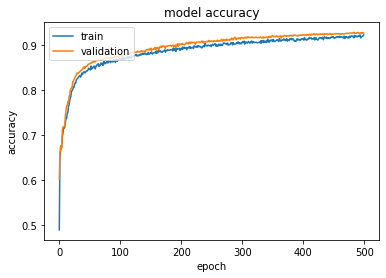

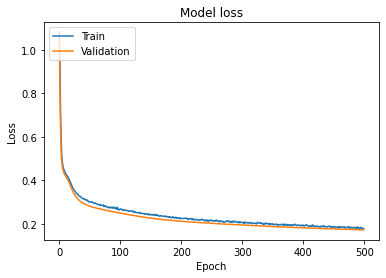

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('acc3.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('modelloss3.png')
plt.show()

[[3797  324    2]
 [ 347 2362    1]
 [   2    0 1889]]
0.9213783062363504
0.8719084533038022


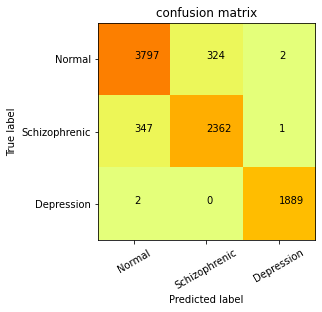

In [72]:
confusion = metrics.confusion_matrix(y_train, predicted, labels=[0, 1, 2])
print(confusion)
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[1, 0]
FN = confusion[0, 1]
sensitivity = TP / float(FN + TP)

print(sensitivity)

specificity = TN / (TN + FP)

print(specificity)

plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal', 'Schizophrenic', 'Depression']
plt.title('confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=30)
plt.yticks(tick_marks, classNames)
#s = [['TP','FN'], ['FP', 'TN']]
for i in range(3):
    for j in range(3):
        #plt.text(j,i, str(s[i][j])+" = "+str(confusion[i][j]))
        plt.text(j,i,str(confusion[i][j]))
plt.savefig('cm3.pdf')
plt.show()

In [82]:
#X_t = t[:,0:-1]
#y_t = t[:,-1]
#scaler = StandardScaler()
#X_t = scaler.fit_transform(X_t)

np.set_printoptions(precision=3)

#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
expected = y_test
predicted = model.predict_classes(X_test)
accuracy = accuracy_score(expected, predicted)
precision = precision_score(expected, predicted, average='macro')
recall = recall_score(expected, predicted, average='macro')
f1 = f1_score(expected, predicted , average='macro')

print("")
print("Accuracy")
print("%.3f" %accuracy)
print("precision")
print("%.3f" % precision)
print("recall")
print("%.3f" %recall)
print("f-score")
print("%.3f" %f1)


Accuracy
0.928
precision
0.936
recall
0.936
f-score
0.936


In [19]:
history.history.keys()


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])